In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
choice = 3  #start from 0
devices = ['nfet_01v8_lvt', 'nfet_01v8', 'pfet_01v8_lvt', 'pfet_01v8']

# widths used for characterization and BSIM4 fringe cap parameters (fringe caps are not included in ngspice output)
w = np.array([5, 5, 5, 5])
cgdo_w = np.array([2.39289e-10, 2.44907e-10, 2e-11, 5.24893e-11])*1e-6

In [45]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
par_prefix = par_names[1].split('[')[0]

# remove extra headers in file body and unwanted columns
df_raw = df_raw[~df_raw['v-sweep'].str.contains('v-sweep')]
df = df_raw.drop(['v-sweep', 'v-sweep.1'], axis=1)
df = df.apply(pd.to_numeric)

# rename columns for readability
df.columns = df.columns.str.removeprefix(par_prefix+'[')
df.columns = df.columns.str.removesuffix(']')
df

,capbd,capbs,cdd,cgb,cgd,cgg,cgs,css,gds,gm,gmbs,id,l,vth,b,d,g
0,2.813000e-15,2.813000e-15,1.011000e-16,-2.582000e-15,-7.176000e-17,2.620000e-15,3.303000e-17,-1.829000e-17,8.637000e-11,1.862000e-32,6.028000e-33,0.000000,1.500000e-07,0.799,0.0,0.0,0.000
1,2.813000e-15,2.813000e-15,1.195000e-16,-2.560000e-15,-8.482000e-17,2.605000e-15,4.000000e-17,-2.184000e-17,1.684000e-10,0.000000e+00,0.000000e+00,0.000000,1.500000e-07,0.799,0.0,0.0,-0.025
2,2.813000e-15,2.813000e-15,1.411000e-16,-2.538000e-15,-1.002000e-16,2.591000e-15,4.773000e-17,-2.571000e-17,3.261000e-10,0.000000e+00,0.000000e+00,0.000000,1.500000e-07,0.799,0.0,0.0,-0.050
3,2.813000e-15,2.813000e-15,1.665000e-16,-2.517000e-15,-1.181000e-16,2.578000e-15,5.667000e-17,-3.019000e-17,6.252000e-10,0.000000e+00,0.000000e+00,0.000000,1.500000e-07,0.799,0.0,0.0,-0.075
4,2.813000e-15,2.813000e-15,1.962000e-16,-2.495000e-15,-1.392000e-16,2.567000e-15,6.696000e-17,-3.532000e-17,1.184000e-09,0.000000e+00,0.000000e+00,0.000000,1.500000e-07,0.799,0.0,0.0,-0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255834,1.514000e-15,2.342000e-15,1.100000e-17,-1.456000e-16,-9.979000e-18,8.442000e-14,-8.426000e-14,5.389000e-14,1.094000e-07,6.127000e-05,1.354000e-05,0.000019,3.000000e-06,1.134,0.4,-1.8,-1.700
255835,1.514000e-15,2.342000e-15,1.184000e-17,-4.667000e-17,-1.075000e-17,8.462000e-14,-8.456000e-14,5.402000e-14,1.196000e-07,6.353000e-05,1.409000e-05,0.000020,3.000000e-06,1.134,0.4,-1.8,-1.725
255836,1.514000e-15,2.342000e-15,1.275000e-17,4.934000e-17,-1.157000e-17,8.480000e-14,-8.484000e-14,5.415000e-14,1.304000e-07,6.576000e-05,1.464000e-05,0.000022,3.000000e-06,1.134,0.4,-1.8,-1.750
255837,1.514000e-15,2.342000e-15,1.370000e-17,1.428000e-16,-1.244000e-17,8.497000e-14,-8.510000e-14,5.426000e-14,1.418000e-07,6.796000e-05,1.519000e-05,0.000024,3.000000e-06,1.134,0.4,-1.8,-1.775


In [46]:
# sweep variable vectors
l = (np.unique(abs(df['l']))/1e-6).round(3)
vgs = np.unique(abs(df['g']))
vds = np.unique(abs(df['d']))
vsb = np.unique(abs(df['b']))

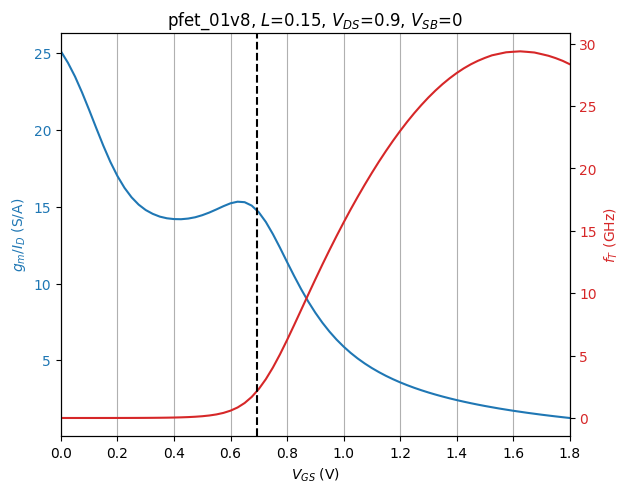

In [47]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=0.9; VSB1=0
df1 = df.loc[(df['l'] == L1*1e-6) & (abs(df['d']) == VDS1) & (abs(df['b']) == VSB1)]
gm_id1 = df1['gm'].values/df1['id'].values
cfringe = w[choice]*cgdo_w[choice]
cgg1 = df1['cgg'].values + 2*cfringe
ft1 = df1['gm'].values/cgg1/2/np.pi

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 1.8)
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

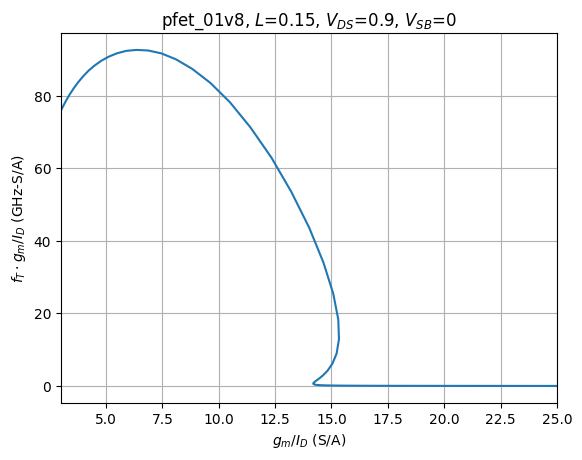

In [48]:
# plot product of gm/ID ant fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

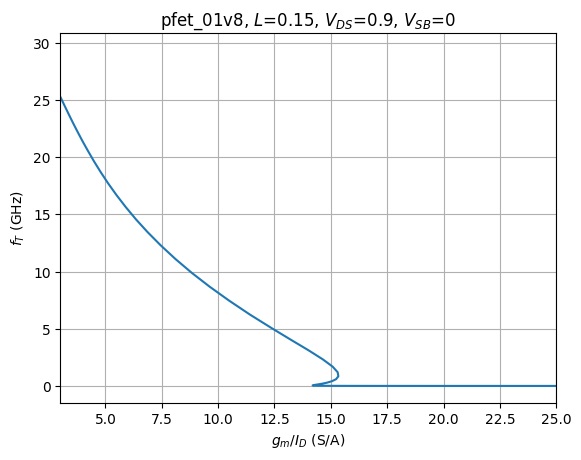

In [49]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

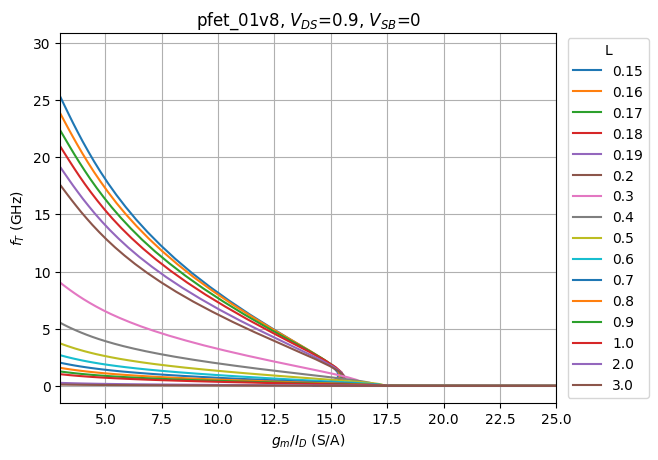

In [50]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
df2 = df.loc[(abs(df['d']) == VDS2) & (abs(df['b']) == VSB2)]
gm_id2 = df2['gm'].values/df2['id'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
ft2 = df2['gm'].values/(df2['cgg'].values+2*cfringe)/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

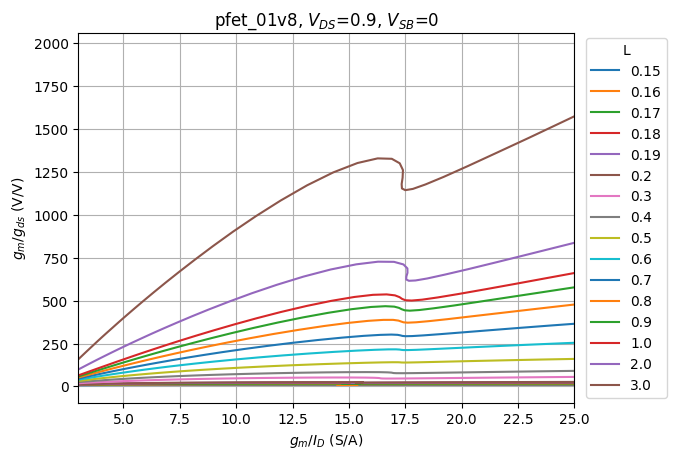

In [51]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

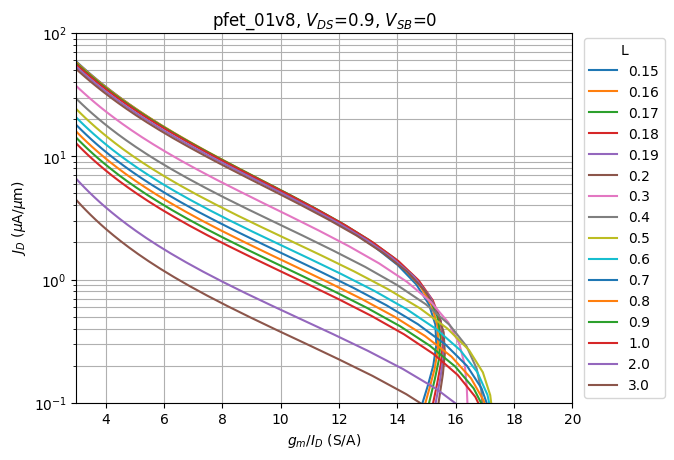

In [52]:
# plot jd versus gm/ID for all L
jd2 = df2['id'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(1e-1, 1e2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()